<a href="https://colab.research.google.com/github/manasc12/Road_Mishap_Risk_Analysis_Using_Machine_Learning_and_Deep_Learning/blob/master/NeuralNetwork_Implementation_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Neural Networks
### Importing Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

<h3> Reading the Data from CSV file </h3>
<h4>1. Accident Data
<br>3. Vehicles Data
<br> We will try to add more and more features this time to build a highly accurate classifier.
<br><h3>Provided:</h3> <h5>Previously we have only used Accident Data to build our classifier without balancing the data and we didn't got a single considerable classifier which can classify most effectively in all of the accident_severity(3,2,1) scenarios.</h5></h4>

In [ ]:
df_Acc=pd.read_csv('/content/drive/My Drive/data/dftRoadSafetyData_Accidents_2018.csv')
df_Veh=pd.read_csv('/content/drive/My Drive/data/dftRoadSafetyData_Vehicles_2018.csv')
df_Acc.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682


In [ ]:
df_Veh

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,0,1,1,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,0,2,1,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,0,1,1,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,1,1,1,6,1,21,5,-1,-1,-1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226404,2018984116018,1,9,0,9,0,0,0,0,0,0,3,1,6,1,67,10,998,1,4,-1,3,-1
226405,2018984116018,2,9,0,15,0,0,1,0,7,4,4,1,6,1,24,5,3000,2,21,-1,3,-1
226406,2018984116018,3,9,0,2,6,0,0,0,0,0,4,1,6,3,-1,-1,2400,2,5,-1,-1,-1
226407,2018984116318,1,2,0,18,0,1,1,0,0,0,3,1,1,1,60,9,49,1,10,-1,3,-1


<h3> Data Cleaning and Wrangling

In [ ]:
#Cleaning up the null valued rows
df_Acc_clnd=df_Acc[~df_Acc.isnull().any(axis=1)]
df_Veh_clnd=df_Veh[~df_Veh.isnull().any(axis=1)]

In [ ]:
#Transforming 'Time' Attribute from hh:mm to only minutes
a= np.array([(int(str(x).split(':')[0])*60+int(str(x).split(':')[1])) for x in df_Acc_clnd['Time'].values])
df_Acc_clnd['Time_Conv']=a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Visualizing the shape 
print('df_Acc.shape---'+str(df_Acc.shape))
print('df_Veh.shape---'+str(df_Veh.shape))
print('df_Acc_clnd.shape---'+str(df_Acc_clnd.shape))
print('df_Veh_clnd.shape---'+str(df_Veh_clnd.shape))
print('----------------------------------------------------------------------')
print('df_Acc_clnd unique values---')
print('----------------------------------------------------------------------')
print(df_Acc_clnd.nunique(axis=0))
print('----------------------------------------------------------------------')
print('df_Veh_clnd unique values---')
print('----------------------------------------------------------------------')
print(df_Veh_clnd.nunique(axis=0))

df_Acc.shape---(122635, 32)
df_Veh.shape---(226409, 23)
df_Acc_clnd.shape---(116181, 33)
df_Veh_clnd.shape---(226409, 23)
----------------------------------------------------------------------
df_Acc_clnd unique values---
----------------------------------------------------------------------
Accident_Index                                 116181
Location_Easting_OSGR                           79980
Location_Northing_OSGR                          80961
Longitude                                      111657
Latitude                                       110374
Police_Force                                       43
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               17
Date                                              365
Day_of_Week                                         7
Time                                             1438
Local_Authority_(District)                        348
Local

In [ ]:
#and Data Types
print('----------------------------------------------------------------------')
print('df_Acc_clnd Data types---')
print('----------------------------------------------------------------------')
print(df_Acc_clnd.dtypes)
print('----------------------------------------------------------------------')
print('df_Veh_clnd Data types---')
print('----------------------------------------------------------------------')
print(df_Veh_clnd.dtypes)

----------------------------------------------------------------------
df_Acc_clnd Data types---
----------------------------------------------------------------------
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Roa

<h4>There are 2 sheets(2 dataframes). So lets check which are the columns(attributes/features) on which we can perform our join operation. Inorder to get a single dataframe.

In [ ]:
print('-----------------------------------------')
print('Columns same in Accident and Vehicle:')
print('-----------------------------------------')
for c1 in df_Acc_clnd.columns:
    for c2 in df_Veh_clnd.columns:
        if(c1==c2):
            print(c1)

-----------------------------------------
Columns same in Accident and Vehicle:
-----------------------------------------
Accident_Index


<h4>Now that we know our join keys so lets merge our 3 dataframes

In [ ]:
df_All_clnd=pd.merge(df_Acc_clnd,df_Veh_clnd,how='inner',on=['Accident_Index'])

<h4> Bifurcating Attributes for Training and Target

In [ ]:
df=df_All_clnd.reset_index(drop=True)

##Drop the columns which are irrelevant to get before the accident or totally irrelevant w.r.t the prediction model.
##We are dropping 'Time' because we have added 'Time_Conv' feature which represents the time of the day.
##The Date feature will be irrelevant while predicting the future accident severities.
df.drop(['Date','Time','Accident_Index','Number_of_Casualties','Vehicle_Reference'
         ,'Police_Force','Did_Police_Officer_Attend_Scene_of_Accident','1st_Point_of_Impact'
         ,'Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway'
         ,'Carriageway_Hazards','Towing_and_Articulation','Vehicle_Location-Restricted_Lane'
        ,'Hit_Object_in_Carriageway'],axis=1,inplace=True)

target_c=['Accident_Severity']
df_train=df.drop(target_c,axis=1)
df_target=df[target_c]

<h4> Balancing/Sampling

Text(0, 0.5, 'No. Of Records')

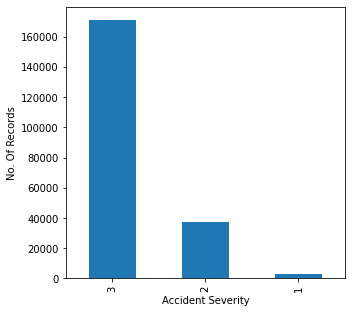

In [ ]:
#Determining Balance of our Data Samples
acc_sev_counts=pd.value_counts(df_target['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3>As u can see our data set is highly unbalanced w.r.t our output feature.
    <h5><br>1. And probably the reason for which we aren't able to train an effective model in our previous attempts.
    <br>2. But now we will resample our data to balance it and then we will apply our 1DCNN on top of it.

<h4> LabelEncoding

In [ ]:
df_train[['LSOA_of_Accident_Location','Local_Authority_(Highway)']]

,LSOA_of_Accident_Location,Local_Authority_(Highway)
0,E01000854,E09000007
1,E01000854,E09000007
2,E01003531,E09000025
3,E01002723,E09000019
4,E01002723,E09000019
...,...,...
211605,W01000498,W06000023
211606,W01000498,W06000023
211607,W01000467,W06000023
211608,W01000496,W06000023


In [ ]:
labelEncodeCols=['LSOA_of_Accident_Location','Local_Authority_(Highway)']
#labelEncodeCols=['Local_Authority_(Highway)']
Local_Authority_Highway               = LabelEncoder()
LSOA_of_Accident_Location               = LabelEncoder()

Local_Authority_Highway.fit(df_train['Local_Authority_(Highway)'])
LSOA_of_Accident_Location.fit(df_train['LSOA_of_Accident_Location'])

df_train['Local_Authority_(Highway)_E']=Local_Authority_Highway.transform(df_train['Local_Authority_(Highway)'])
df_train['LSOA_of_Accident_Location_E']=LSOA_of_Accident_Location.transform(df_train['LSOA_of_Accident_Location'])
df_train.drop(labelEncodeCols,axis=1,inplace=True)


In [ ]:
#Performing Over Sampling
#There are various sampling technique you can use like;- NearMiss, SMOTETomek, RandomOverSampler
## RandomOverSampler to handle imbalanced data

os =  RandomOverSampler(random_state=42)
df_train_smpl, df_target_smpl = os.fit_sample(df_train, df_target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'No. Of Records')

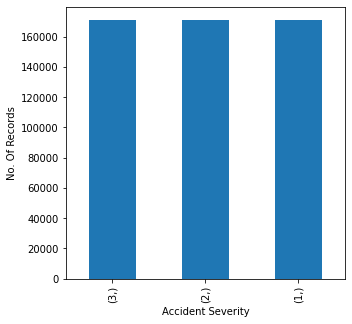

In [ ]:
#Checking the new sampled Data set for balance
acc_sev_counts=pd.DataFrame(df_target_smpl).value_counts(sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3> Splitting up Training and Testing Data Samples

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_train_smpl,df_target_smpl,test_size=0.3,random_state=42,stratify=df_target_smpl)
y1_train=y1_train.reshape(len(y1_train),)
y1_test=y1_test.reshape(len(y1_test),)

### Scaling the Data with standard scaler

In [ ]:
scaler=StandardScaler()
x2_train=scaler.fit_transform(x1_train)
x2_test=scaler.transform(x1_test)
x2_train.min(),x2_train.max()

(-6.947563730835579, 45.035460634688825)

In [ ]:
# Reshaping is only necessary incase of Conv1D Neural networks. Normal ANN donot require reshaping.
x2_train=x2_train.reshape((x2_train.shape[0],x2_train.shape[1],1))
x2_test=x2_test.reshape((x2_test.shape[0],x2_test.shape[1],1))

### Build the Neural Network Model

In [ ]:
model= Sequential()
model.add(Conv1D(32,2,activation='relu',padding='same',input_shape=x2_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128,2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(256,2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 40, 32)            96        
_________________________________________________________________
batch_normalization_19 (Batc (None, 40, 32)            128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 40, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 40, 64)            4160      
_________________________________________________________________
batch_normalization_20 (Batc (None, 40, 64)            256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 40, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 40, 128)          

### We Write a call back function to stop the model from overfitting

In [ ]:
# Define a Callback class that stops training once training_accuracy becomes >= validation_accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=logs.get('val_accuracy')):
      print("\nReached Training accuracy of: {}".format(logs.get('accuracy')))
      print("\nReached Validation accuracy of: {}".format(logs.get('val_accuracy')))
      print("\nNow that our training_accuracy has already reached >= validation_accuracy, we should stop the training!!!")
      self.model.stop_training = True

### Write functions for prediction and Evaluation Criteria

In [ ]:
def predict(x2_test):
    pred=model.predict(x2_test)
    final_pred=[]
    for arr in range(len(pred)):
        final_pred=np.append(final_pred,np.argmax(pred[arr]))
    return final_pred
def plot_confusion_matrix(actual_target_list,predicted_target_list,classes_list,axis_notation_list=[]):
    if len(axis_notation_list)==0:
      axis_notation_list=classes_list
    conf_mat=[]
    actual_target_list=list(actual_target_list)
    for aclass in classes_list:
        row_list=[]
        for pclass in classes_list:
            row_list.append(sum(pd.Series(predicted_target_list)[pd.Series(actual_target_list)==aclass]==pclass))
        conf_mat.append(row_list)
    hw=len(classes_list)*1.5
    fig, ax = plt.subplots(figsize=(hw,hw/2))
    heatmap=sns.heatmap(conf_mat,
            xticklabels=axis_notation_list,yticklabels=axis_notation_list,
            annot=True,cbar=False,ax=ax,fmt='g',cmap='Blues',
                       linewidths=0.3, linecolor='black')


    ax.set(xlabel='Predicted',ylabel='Actual')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    plt.show()
    return conf_mat

def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model_Accuracy')
    plt.legend(['Train','Validate'],loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model_loss')
    plt.legend(['Train','Validate'],loc='upper left')
    plt.show()

#### Compile The Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Train The Model
- batch_size is the number of inputs after which gradient descent method updates the models weights
- epoch is the number of times we will train the model
- Just to stop the model from over-fitting, make sure to limit the training upto an acceptable number of epochs(i.e. where u will hardly notice any significant decrease in loss or increase in accuracy).

In [ ]:
callbacks = myCallback()
history=model.fit(x2_train,y1_train,batch_size=100, epochs=50, validation_data=(x2_test,y1_test),verbose = 1,callbacks=[callbacks])

Epoch 1/50
3597/3597 [==============================] - 80s 22ms/step - loss: 0.9387 - accuracy: 0.5317 - val_loss: 0.8011 - val_accuracy: 0.6151
Epoch 2/50
3597/3597 [==============================] - 79s 22ms/step - loss: 0.6897 - accuracy: 0.6605 - val_loss: 0.5129 - val_accuracy: 0.7348
Epoch 3/50
3597/3597 [==============================] - 79s 22ms/step - loss: 0.5054 - accuracy: 0.7402 - val_loss: 0.4379 - val_accuracy: 0.7696
Epoch 4/50
3597/3597 [==============================] - 79s 22ms/step - loss: 0.4420 - accuracy: 0.7710 - val_loss: 0.4152 - val_accuracy: 0.7839
Epoch 5/50
3597/3597 [==============================] - 80s 22ms/step - loss: 0.4029 - accuracy: 0.7954 - val_loss: 0.3935 - val_accuracy: 0.8020
Epoch 6/50
3597/3597 [==============================] - 79s 22ms/step - loss: 0.3690 - accuracy: 0.8184 - val_loss: 0.3528 - val_accuracy: 0.8280
Epoch 7/50
3597/3597 [==============================] - 79s 22ms/step - loss: 0.3363 - accuracy: 0.8390 - val_loss: 0.3359 -

In [ ]:
y1_pred=predict(x2_test)

In [ ]:
np.unique(y1_pred,return_counts=False)

array([1., 2., 3.])

#### Plot Confusion Matrix and other relevant Evaluation Criteria

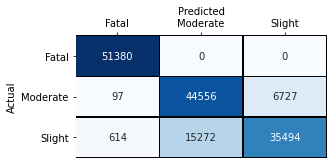

[[51380, 0, 0], [97, 44556, 6727], [614, 15272, 35494]]

In [ ]:
plot_confusion_matrix(y1_test,y1_pred,[1,2,3],['Fatal','Moderate','Slight'])

#### Plot the Learning Curve

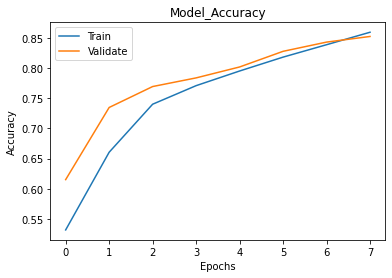

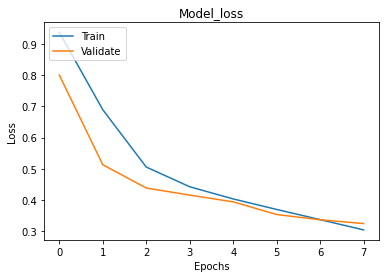

In [ ]:
plot_learning_curve(history)